# Лабораторна робота №1
### Варіант 23(11)

In [213]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

pred = {}
coeff = {}

In [214]:
x = [2.1, 2.84 ,3.21, 3.96,4.86, 6.06, 7.47, 9.25]
y = [1.00, 1.64, 2.28, 2.91, 3.56, 4.29, 4.84, 5.48]

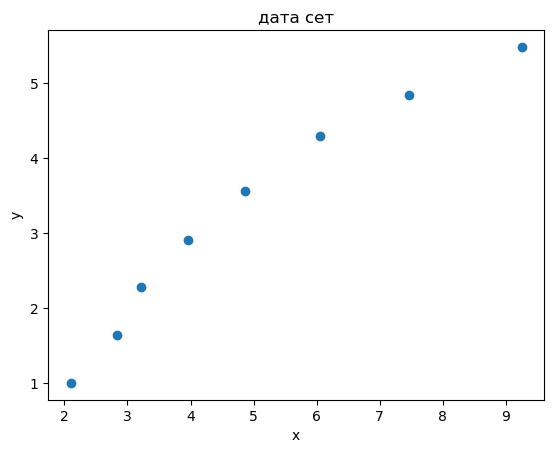

In [215]:
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('дата сет')
plt.show()

### Первірка залежності х та у

In [216]:
cor = np.corrcoef(x, y)
print(f'коефіцієнт кореляції: {cor[0][1]}')

коефіцієнт кореляції: 0.9750107444317592


### Лінійна регресія

In [217]:
def linear_regression(x, y):
    M_x = np.mean(x)
    M_x2 = np.mean([i**2 for i in x])

    M_y = np.mean(y)
    M_xy = np.mean([x[i]*y[i] for i in range(len(x))])

    a = (M_xy - M_x*M_y)/(M_x2 - M_x**2)
    b = M_y - a*M_x
    return a, b

In [218]:
a, b = linear_regression(x, y)
print(f'рівняння лінійної регресії: y = {a}x + {b}')
coeff['linear'] = (a, b)

рівняння лінійної регресії: y = 0.6225092716933596x + 0.15690705627361945


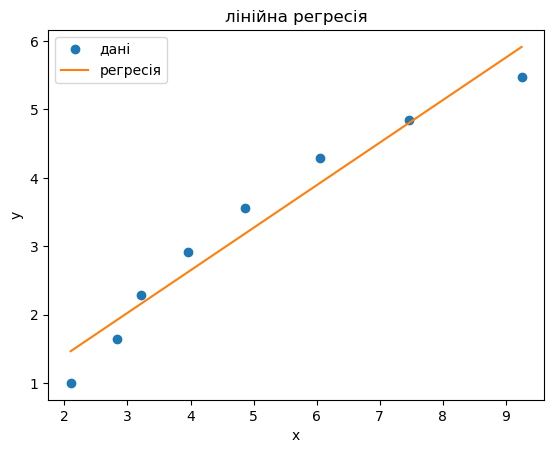

In [219]:
y_pred = [a * xi + b for xi in x]
pred['linear'] = y_pred
plt.plot(x, y, 'o', label='дані')
plt.plot(x, y_pred, label='регресія')
plt.xlabel('x')
plt.ylabel('y')
plt.title('лінійна регресія')
plt.legend()
plt.show()

### Квадратична регресія

In [220]:
def quad_regression(x, y):
    M_x = np.mean(x)
    M_x2 = np.mean([i**2 for i in x])
    M_y = np.mean(y)
    M_xy = np.mean([x[i]*y[i] for i in range(len(x))])
    M_x3 = np.mean([i**3 for i in x])
    M_x4 = np.mean([i**4 for i in x])
    M_x2y = np.mean([x[i]**2*y[i] for i in range(len(x))])

    A = np.array([
        [M_x4, M_x3, M_x2],
        [M_x3, M_x2, M_x],
        [M_x2, M_x, 1]
    ])
    B = np.array([M_x2y, M_xy, M_y])
    a, b, c = np.linalg.solve(A, B)
    return a, b, c

In [221]:
a, b, c = quad_regression(x, y)
print(f'рівняння квадратичної регресії: y = {a}x^2 + {b}x + {c}')
coeff['quad'] = (a, b, c)

рівняння квадратичної регресії: y = -0.06716935713712138x^2 + 1.3776992414875022x + -1.5789526751444696


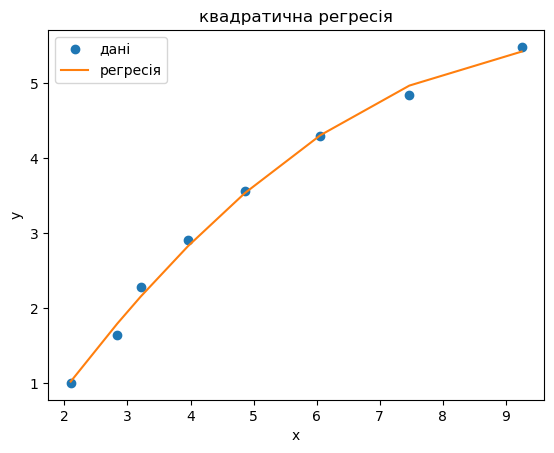

In [222]:
y_pred = [a * xi**2 + b*xi + c for xi in x]
pred['quad'] = y_pred
plt.plot(x, y, 'o', label='дані')
plt.plot(x, y_pred, label='регресія')
plt.xlabel('x')
plt.ylabel('y')
plt.title('квадратична регресія')
plt.legend()
plt.show()

### Степенева регресія

In [223]:
x_ln = [math.log(i) for i in x]
y_ln = [math.log(i) for i in y]
print(np.array([x_ln, y_ln]))

a, b = linear_regression(x_ln, y_ln)
print(f'рівняння степеневої регресії\n a={a} b={b}\n y = {np.exp(b)}x^{a}')
coeff['power'] = (a, b)

[[0.74193734 1.04380405 1.16627094 1.37624403 1.58103844 1.8017098
  2.010895   2.22462355]
 [0.         0.49469624 0.82417544 1.06815308 1.26976054 1.45628673
  1.57691472 1.7011051 ]]
рівняння степеневої регресії
 a=1.1176649517993757 b=-0.6201397941089662
 y = 0.5378692413874634x^1.1176649517993757


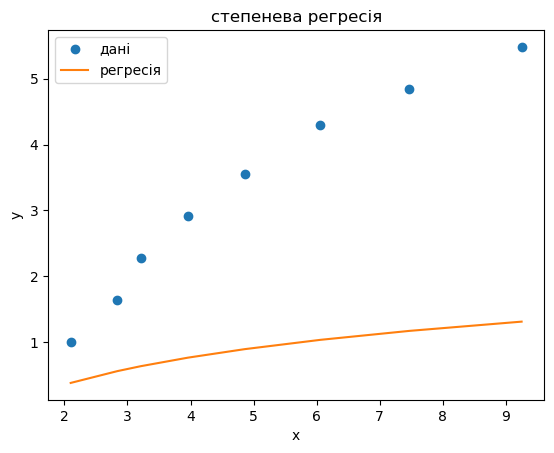

In [224]:
y_pred = [np.exp(b) * xi**a for xi in x_ln]
pred['power'] = y_pred
plt.plot(x, y, 'o', label='дані')
plt.plot(x, y_pred, label='регресія')
plt.xlabel('x')
plt.ylabel('y')
plt.title('степенева регресія')
plt.legend()
plt.show()

### Показникова регресія

In [225]:
y_ln = [np.log(i) for i in y]
a, b = linear_regression(x, y_ln)
print(f'рівняння показникової регресії\n a={a} b={b}\n y = {np.exp(b)}e^({a}*x)')
coeff['exp'] = (a, b)

рівняння показникової регресії
 a=0.21326955766333683 b=-0.010796631454931482
 y = 0.9892614429797908e^(0.21326955766333683*x)


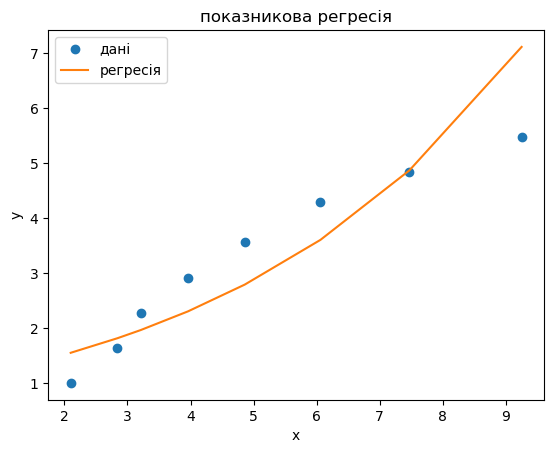

In [226]:
y_pred = [np.exp(b) * np.exp(a*xi) for xi in x]
pred['exp'] = y_pred
plt.plot(x, y, 'o', label='дані')
plt.plot(x, y_pred, label='регресія')
plt.xlabel('x')
plt.ylabel('y')
plt.title('показникова регресія')
plt.legend()
plt.show()

### Логарифмічна регресія

In [227]:
x_ln = [np.log(i) for i in x]

a, b = linear_regression(x_ln, y)

print(f'рівняння логарифмічної регресії\n a={a} b={b}\n y = {a}ln(x) + ({b})')
coeff['log'] = (a, b)

рівняння логарифмічної регресії
 a=3.1085771169448186 b=-1.392086060605246
 y = 3.1085771169448186ln(x) + (-1.392086060605246)


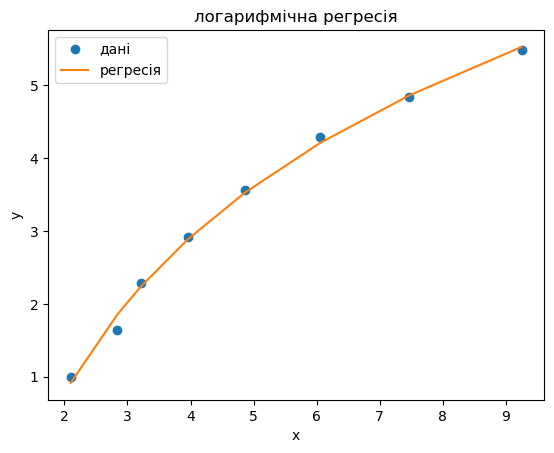

In [228]:
y_pred = [a * np.log(xi) + b for xi in x]
pred['log'] = y_pred
plt.plot(x, y, 'o', label='дані')
plt.plot(x, y_pred, label='регресія')
plt.xlabel('x')
plt.ylabel('y')
plt.title('логарифмічна регресія')
plt.legend()
plt.show()

### Гіперболічна регресія

In [229]:
x_rev = [1/i for i in x]
y_rev = [1/i for i in y]

a, b = linear_regression(x_rev, y_rev)

print(f'рівняння гіперболічної регресії\n a={a} b={b}\n y = {a}/x + {b}')
coeff['hyper'] = (a, b)

рівняння гіперболічної регресії
 a=2.145375635705744 b=-0.12582821162732405
 y = 2.145375635705744/x + -0.12582821162732405


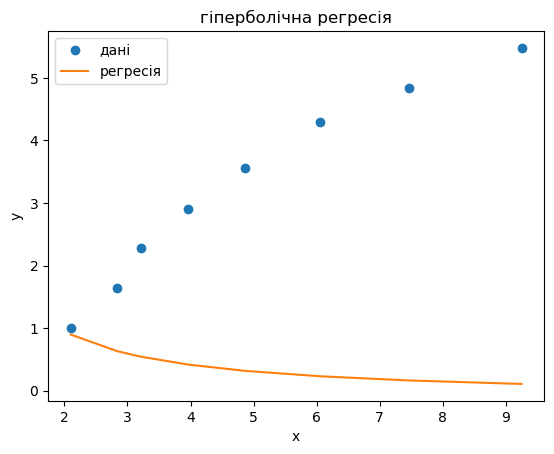

In [230]:
y_pred = [a / xi + b for xi in x]
pred['hyper'] = y_pred
plt.plot(x, y, 'o', label='дані')
plt.plot(x, y_pred, label='регресія')
plt.xlabel('x')
plt.ylabel('y')
plt.title('гіперболічна регресія')
plt.legend()
plt.show()

## Оцінка результатів

In [231]:
coeff_df = pd.DataFrame.from_dict(coeff, orient='index', columns=['a', 'b', 'c']).fillna("")
coeff_df

,a,b,c
linear,0.622509,0.156907,
quad,-0.067169,1.377699,-1.578953
power,1.117665,-0.620140,
exp,0.213270,-0.010797,
log,3.108577,-1.392086,
hyper,2.145376,-0.125828,


In [232]:
pred_df = pd.DataFrame.from_dict(pred, orient='index')
pred_df.columns = x
pred_df

,2.10,2.84,3.21,3.96,4.86,6.06,7.47,9.25
linear,1.464177,1.924833,2.155162,2.622044,3.182302,3.929313,4.807051,5.915118
quad,1.017999,1.791952,2.151342,2.823413,3.530152,4.303204,4.964350,5.417587
power,0.385293,0.564269,0.638758,0.768585,0.897486,1.038596,1.174260,1.314599
exp,1.548164,1.812830,1.961675,2.301937,2.789029,3.602460,4.866266,7.113161
log,0.914283,1.852659,2.233357,2.886075,3.522694,4.208668,4.858936,5.523328
hyper,0.895779,0.629586,0.542513,0.415933,0.315607,0.228194,0.161371,0.106104


In [233]:
determination_df = pd.DataFrame(columns=['linear', 'quad', 'power', 'exp', 'log', 'hyper']).T
determination_df['R^2'] = [sum((y - pred_df.iloc[i])**2)/sum((y - np.average(y))**2) for i in range(len(pred_df))]
determination_df

,R^2
linear,0.049354
quad,0.003904
power,3.292920
exp,0.260868
log,0.003770
hyper,5.064101
